In [268]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel("dados_matriculas.xlsx")
print(df.columns)

Index(['Mês', 'Matrículas'], dtype='object')


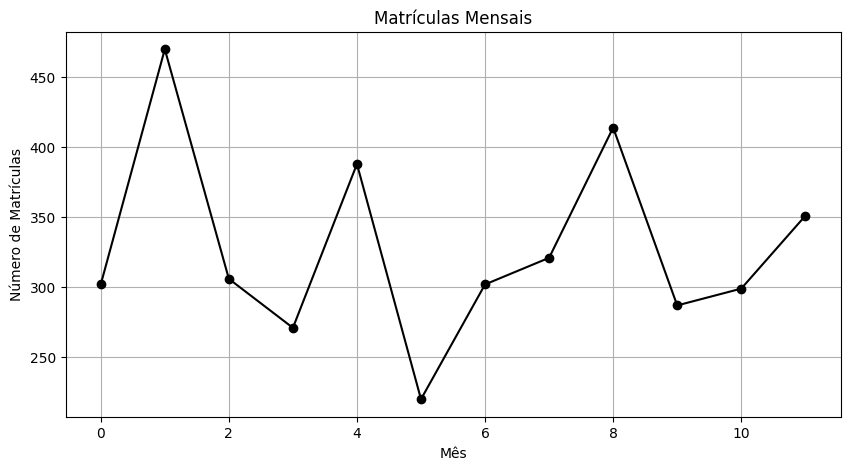

In [269]:
# gráfico de matriculas mensais

plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='o',linestyle='-',color='black')
plt.title('Matrículas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matrículas')
plt.grid(True)
plt.show()

In [270]:
#Verificar o mês com maior e menor número de matrículas

maior_matricula = df['Matrículas'].max()
indice_maior_matricula = df['Matrículas'].idxmax()

print(maior_matricula)
print(indice_maior_matricula)

470
1


In [271]:
menor_matricula = df['Matrículas'].min()
indice_menor_matricula = df['Matrículas'].idxmin()

print(menor_matricula)
print(indice_menor_matricula)

220
5


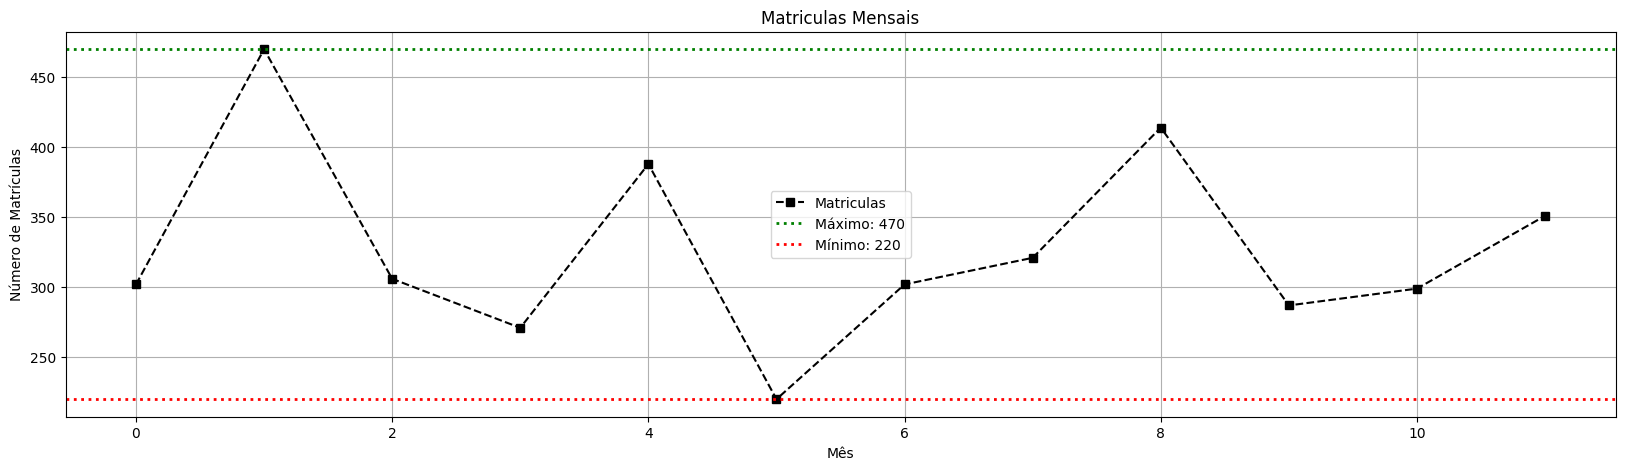

In [272]:
plt.figure(figsize=(20,5))
df['Matrículas'].plot(marker='s',
                      linestyle='--',
                      color='black',
                      label='Matriculas',
                      mfc='black')

#Informações de destaque
plt.axhline(y=maior_matricula,
            color='green',
            linestyle=':',
            linewidth=2,
            label=f"Máximo: {maior_matricula}")

plt.axhline(y=menor_matricula,
            color='red',
            linestyle=':',
            linewidth=2,
            label=f"Mínimo: {menor_matricula}")

plt.title('Matriculas Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Matrículas')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [273]:
media = df['Matrículas'].mean()

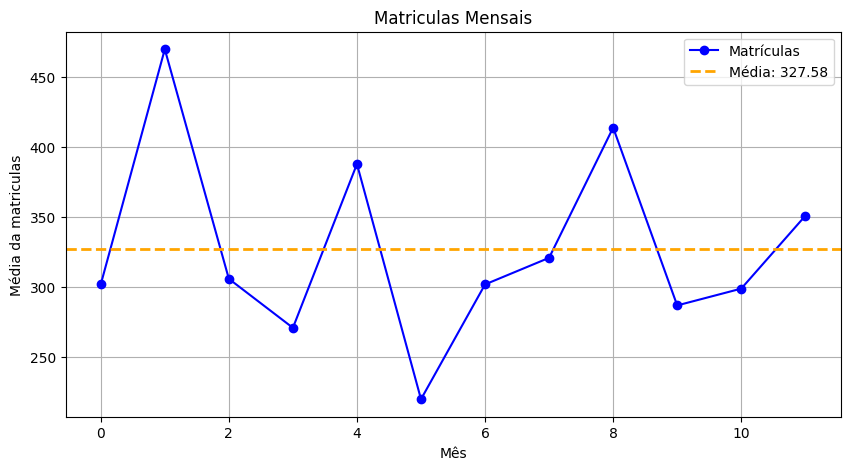

In [274]:
plt.figure(figsize=(10,5))
df['Matrículas'].plot(marker='o', linestyle='-', color='blue', label='Matrículas')

#linhas de destaque
plt.axhline(y=media,
           color='orange',
           linestyle='--',
           linewidth=2,
           label=f'Média: {media:.2f}'
           )

plt.title("Matriculas Mensais")
plt.xlabel("Mês")
plt.ylabel("Média da matriculas")
plt.grid(True)
plt.legend()
plt.show()

In [275]:
# calcular a media das matriculas por trimestre

print(df.dtypes)
df['Mês'] = pd.to_datetime(df['Mês'])

# Definir a coluna de datas como indice

df.set_index('Mês', inplace=True)

#Calcular a média do trimestre
# QE / trimestre
# QS / semestre
# Q / quadrimestre
# A / anual
# D / Diario
# W / Semanal
# H / Horario
media_trimestral = df['Matrículas'].resample('QE').mean().round(2)

print(media_trimestral)

Mês           datetime64[ns]
Matrículas             int64
dtype: object
Mês
2022-03-31    359.33
2022-06-30    293.00
2022-09-30    345.67
2022-12-31    312.33
Freq: QE-DEC, Name: Matrículas, dtype: float64


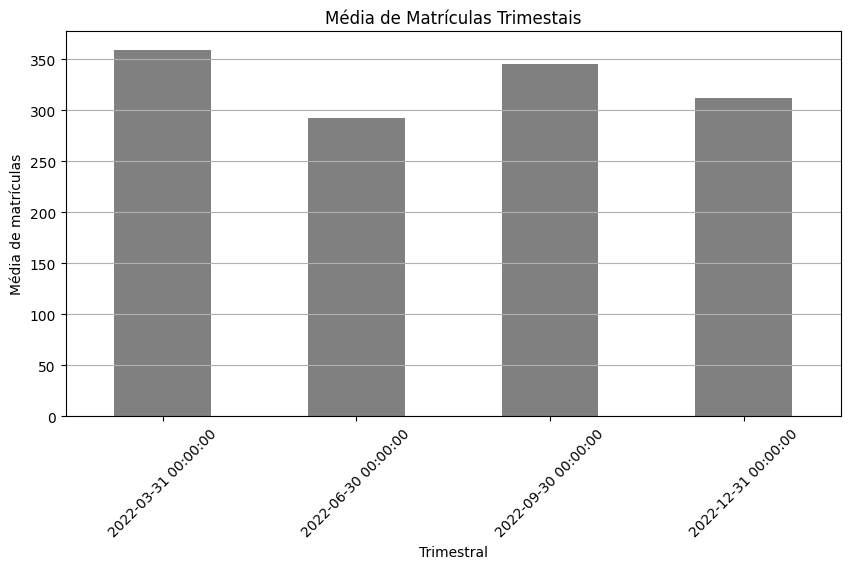

In [276]:
plt.figure(figsize=(10,5))
media_trimestral.plot(kind='bar', color='grey')
plt.title("Média de Matrículas Trimestais")
plt.xlabel("Trimestral")
plt.ylabel("Média de matrículas")
plt.xticks(rotation=45)
plt.grid(axis='y')


# desvio padrão
# passo 1 calcular a media
# passo 2 desvio em relação a média

jan - 340
fev - 345
mar - 355
abr - 600

media - 410

desvio 
jan = 340 - 410 = 70
fev = 345 - 410 = -65
etc...

In [277]:
#desvio padrão

df['Matrículas'].std()

# simples

df['Matrículas'] - df['Matrículas'].mean()

Mês
2022-01-31    -25.583333
2022-02-28    142.416667
2022-03-31    -21.583333
2022-04-30    -56.583333
2022-05-31     60.416667
2022-06-30   -107.583333
2022-07-31    -25.583333
2022-08-31     -6.583333
2022-09-30     86.416667
2022-10-31    -40.583333
2022-11-30    -28.583333
2022-12-31     23.416667
Name: Matrículas, dtype: float64

VARIANCIA
1. Tirar a média
2. Tira o desvio simples

Passo 1. Valor do desvio elevado a 2
Jan = -70 ^2= 4900
fev = - 75 ^2 = 4225
mar = -55 ^2 = 3025
abr = 190 ^2 = 36100 

Passo 2. Media do desvio elevado 
MEDIA = 12062.5
Raiz quadrada = 109.8

In [278]:
# calcula

variacao = df['Matrículas'].pct_change() * 100



In [ ]:
import seaborn as sn

tabela_variacao = pd.DataFrame({
    'Matricula': df['Matrículas'],
    'Variacao Percentual': variacao
})
def colorir_variacao(valor):
    if valor > 0:
        color = 'green'
    elif valor < 0:
        color ='red'
    else:
        color ='blue'
    return f'color: {color}'

tabela_variacao.style.map(colorir_variacao, subset=['Variacao Percentual'])

,Matricula,Variacao Percentual
Mês,,
2022-01-31 00:00:00,302,nan
2022-02-28 00:00:00,470,55.629139
2022-03-31 00:00:00,306,-34.893617
2022-04-30 00:00:00,271,-11.437908
2022-05-31 00:00:00,388,43.173432
2022-06-30 00:00:00,220,-43.298969
2022-07-31 00:00:00,302,37.272727
2022-08-31 00:00:00,321,6.291391
2022-09-30 00:00:00,414,28.971963
